# 3. Question fomulation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
filepath = "../data/processed/fill_missing_values.csv"
df = pd.read_csv(filepath)

### 3.1. Câu hỏi 1

#### 1. Câu hỏi
- Research Question: Nghệ sĩ có mức độ phổ biến cao (`artist_popularity`) hoặc nhiều người theo dõi (`artist_followers`) hơn có xu hướng phát hành các bài hát có độ phổ biến (`track_popularity`) cao hơn hay không?

- Câu hỏi này có thể trả lời trực tiếp bằng dữ liệu hiện có thông qua phân tích tương quan và trực quan hóa giữa các biến liên quan.

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ liệu mức độ nổi tiếng của nghệ sĩ có ảnh hưởng trực tiếp đến độ phổ biến của bài hát hay không.

- Lợi ích / insight mang lại là gì?  
    → Kết quả cho thấy vai trò của artist_popularity và artist_followers trong việc dự đoán mức độ thành công của một bài hát.

- Ai quan tâm đến kết quả này?  
    → Các hãng thu âm, nền tảng phát nhạc trực tuyến, nhà sản xuất âm nhạc và nghệ sĩ.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ các quyết định về chiến lược quảng bá, phân bổ nguồn lực marketing và phát hiện, đầu tư vào nghệ sĩ mới.

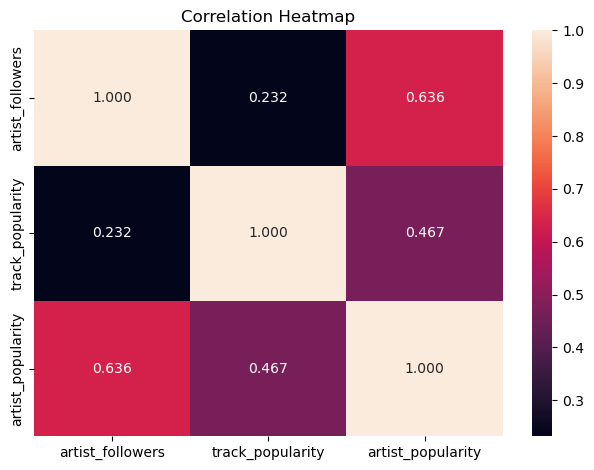

In [2]:
df_corr = df[['artist_followers', 'track_popularity', 'artist_popularity']].dropna()
corr_matrix = df_corr.corr()
plt.figure()
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt='.3f',        
    linewidths=0,      
    cbar=True
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Kết luận ngắn gọn:**

- Artist popularity và Track popularity có tương quan trung bình–khá (r ≈ 0.47) → nghệ sĩ càng phổ biến thì bài hát có xu hướng phổ biến hơn.

- Artist followers và Track popularity có tương quan yếu (r ≈ 0.23) → nhiều follower không đảm bảo bài hát sẽ nổi.

- Artist followers và Artist popularity có tương quan khá mạnh (r ≈ 0.64) → hai thước đo này liên quan chặt chẽ, nhưng không tương đương khi dự đoán độ phổ biến bài hát.

→ `artist_popularity` là chỉ báo tốt hơn `artist_followers` khi dự đoán `track_popularity`

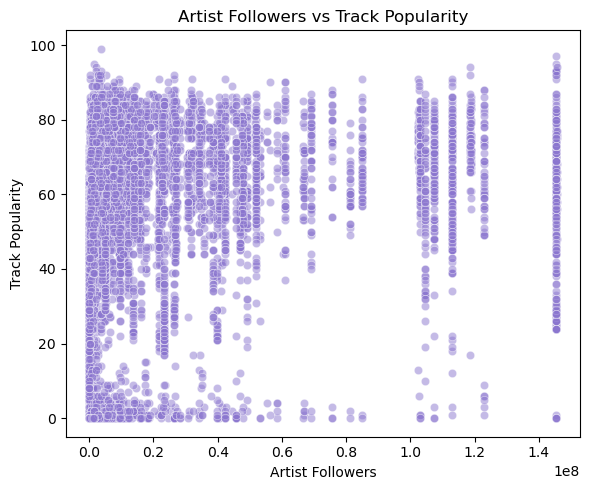

In [3]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='artist_followers',
    y='track_popularity',
    alpha=0.5,
    color = "#8B76CF"
)
 
plt.title('Artist Followers vs Track Popularity')
plt.xlabel('Artist Followers')
plt.ylabel('Track Popularity')

plt.tight_layout()
plt.show()

**Kết luận về mối liên hệ artist_followers và track_popularity :**

- Không có xu hướng tuyến tính rõ ràng giữa số lượng người theo dõi và độ phổ biến bài hát.

- Nhiều nghệ sĩ có rất ít follower vẫn phát hành bài hát có track_popularity cao.

- Ngược lại, nghệ sĩ có rất nhiều follower vẫn có nhiều bài ít phổ biến hoặc không phổ biến.

- Dữ liệu phân tán mạnh, cho thấy artist_followers không phải yếu tố quyết định trực tiếp đến độ phổ biến của từng bài hát.

→ **Kết luận tổng quát:** số follower phản ánh quy mô fanbase, nhưng không dự đoán tốt mức độ thành công của một bài hát cụ thể.

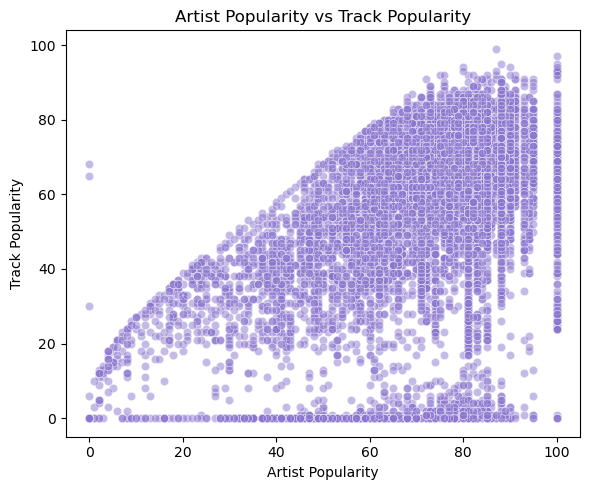

In [4]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=df,
    x='artist_popularity',
    y='track_popularity',
    alpha=0.5,
    color = "#8B76CF"
)
plt.title('Artist Popularity vs Track Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

plt.tight_layout()
plt.show()

**Kết luận về mối liên hệ artist_popularity và track_popularity :**

- Có xu hướng tăng rõ ràng: nghệ sĩ càng phổ biến thì bài hát có khả năng đạt độ phổ biến cao hơn.

- Tuy nhiên, dữ liệu phân tán mạnh → cùng một mức artist_popularity vẫn có bài rất nổi và bài gần như không nổi.

- Nhiều điểm nằm sát track_popularity = 0 cho thấy: độ phổ biến của nghệ sĩ không đảm bảo thành công cho từng bài hát.

→ **Kết luận tổng quát:** `artist_popularity` là yếu tố ảnh hưởng tích cực nhưng không quyết định đến track_popularity; cần thêm các yếu tố khác (thời điểm phát hành, genre, marketing, playlist, …) để giải thích đầy đủ.

**Kết luận tổng quan:**  
Trả lời dựa trên dữ liệu:
- Kết quả cho thấy `artist_popularity` có tương quan dương mức trung bình với `track_popularity` (r = 0.467), trong khi `artist_followers` chỉ có tương quan dương yếu (r = 0.232). Điều này cho thấy độ phổ biến của nghệ sĩ có liên quan đến độ phổ biến của bài hát, nhưng không phải yếu tố quyết định tuyệt đối.  
  
**Trả lời cho động cơ và lợi ích:**
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Vì kết quả cho thấy mức độ nổi tiếng của nghệ sĩ không ảnh hưởng như nhau đến độ phổ biến của bài hát: `artist_popularity` có tương quan dương mức trung bình với `track_popularity` (r = 0.467), trong khi `artist_followers` chỉ có tương quan dương yếu (r = 0.232). Điều này cho thấy cần phân biệt rõ các khía cạnh khác nhau của “độ nổi tiếng” khi đánh giá thành công bài hát.  
      
- Lợi ích / insight mang lại là gì?  
    → Phân tích cho thấy `artist_popularity` là yếu tố dự đoán độ phổ biến bài hát tốt hơn so với số lượng người theo dõi, đồng thời chỉ ra rằng danh tiếng nghệ sĩ chỉ giải thích một phần mức độ thành công của bài hát.  
      
- Ai quan tâm đến kết quả này?  
    → Các hãng thu âm, nền tảng phát nhạc trực tuyến, nhà sản xuất âm nhạc và nghệ sĩ, vì kết quả giúp họ hiểu rõ mức độ ảnh hưởng thực tế của độ nổi tiếng nghệ sĩ đến hiệu suất bài hát.  
       
- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?    
    → Kết quả hỗ trợ quyết định không chỉ tập trung marketing vào nghệ sĩ có nhiều người theo dõi, mà cần ưu tiên nghệ sĩ có mức độ phổ biến cao và đầu tư thêm vào chất lượng bài hát cũng như chiến lược quảng bá.

### 3.2. Câu hỏi 2

#### 1. Câu hỏi
- Research Question: Xu hướng sáng tác các thể loại âm nhạc (`artist_genres`) thay đổi như thế nào theo thời gian trên Spotify?

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ sự thay đổi trong xu hướng thể loại âm nhạc theo thời gian, phản ánh thị hiếu người nghe và sự phát triển của thị trường âm nhạc trên Spotify.

- Lợi ích / insight mang lại là gì?  
    → Cho thấy thể loại nào đang trở nên phổ biến, thể loại nào suy giảm, và cách các xu hướng âm nhạc dịch chuyển qua các giai đoạn khác nhau.

- Ai quan tâm đến kết quả này?  
    → Nền tảng phát nhạc trực tuyến, hãng thu âm, nhà sản xuất âm nhạc, nghệ sĩ và các nhà nghiên cứu văn hóa – âm nhạc.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ định hướng sáng tác, lập kế hoạch phát hành, chiến lược playlist và dự đoán xu hướng âm nhạc trong tương lai.

In [5]:
df_genre_year = df[['year', 'genres_final']].dropna()
genre_year_count = (
    df_genre_year
    .groupby(['year', 'genres_final'])
    .size()
    .reset_index(name='track_count')
)

genre_year_count.head(20)

,year,genres_final,track_count
0,1952,country,1
1,1958,other,1
2,1959,other,5
3,1960,other,1
4,1962,other,3
5,1962,unknown,2
6,1963,other,1
7,1964,other,1
8,1965,other,3
9,1966,other,4


In [6]:
TOP_N = 5

top_genres = (
    genre_year_count
    .groupby('genres_final')['track_count']
    .sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)

genre_year_top = genre_year_count[
    genre_year_count['genres_final'].isin(top_genres)
]


In [7]:

genre_trend_table = genre_year_top.pivot(
    index='year',
    columns='genres_final',
    values='track_count'
).fillna(0)

genre_trend_table.head()

genres_final,"country, pop, indie, folk",other,pop,soundtrack,unknown
year,,,,,
1958,0.0,1.0,0.0,0.0,0.0
1959,0.0,5.0,0.0,0.0,0.0
1960,0.0,1.0,0.0,0.0,0.0
1962,0.0,3.0,0.0,0.0,2.0
1963,0.0,1.0,0.0,0.0,0.0


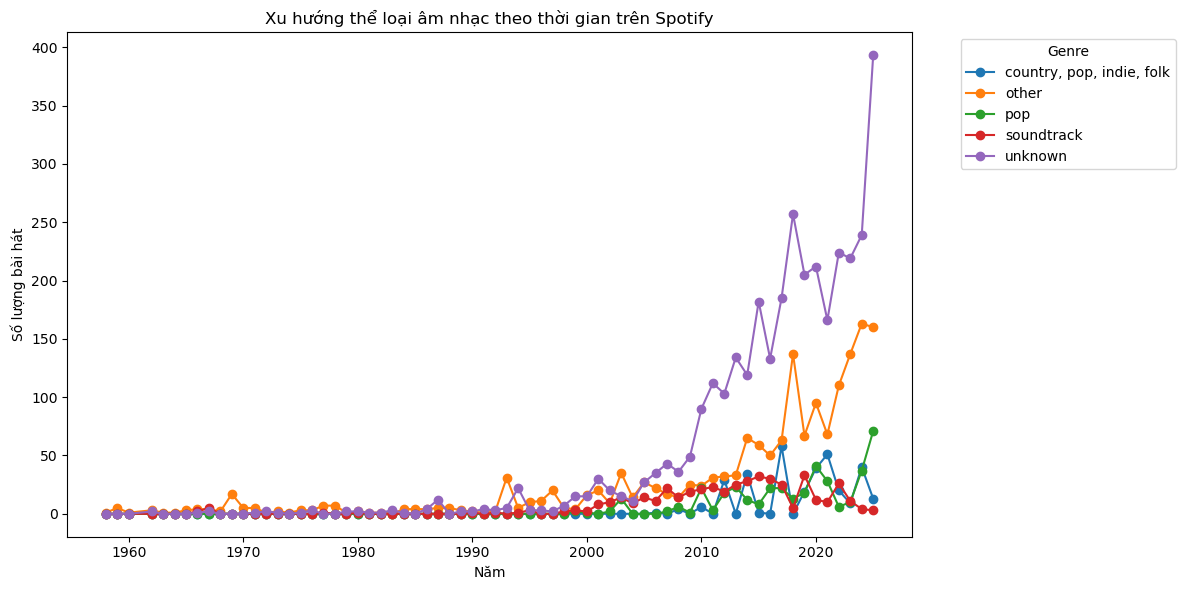

In [8]:
plt.figure(figsize=(12, 6))

for genre in genre_trend_table.columns:
    plt.plot(
        genre_trend_table.index,
        genre_trend_table[genre],
        marker='o',
        label=genre
    )

plt.title('Xu hướng thể loại âm nhạc theo thời gian trên Spotify')
plt.xlabel('Năm')
plt.ylabel('Số lượng bài hát')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Kết luận tổng quan:**  
Trả lời dựa trên dữ liệu:
- Bùng nổ số lượng: Từ sau năm 2010, số lượng bài hát trên Spotify tăng vọt theo cấp số nhân, phản ánh sự thống trị của nhạc số.
- Nhóm "Unknown" chiếm ưu thế: Thể loại không xác định (màu tím) tăng trưởng mạnh nhất và vượt xa các nhóm còn lại, cho thấy dữ liệu phân loại còn thiếu sót hoặc xuất hiện nhiều dòng nhạc mới khó định danh.
- Sự đa dạng hóa: Nhóm "Other" (màu cam) đứng thứ hai về tốc độ tăng, chứng tỏ xu hướng nghe nhạc ngày càng đa dạng, không chỉ tập trung vào các dòng nhạc truyền thống như Pop hay Country.
  
**Trả lời cho động cơ và lợi ích:**
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Biểu đồ cho thấy xu hướng thể loại âm nhạc thay đổi rất rõ theo thời gian: từ trước năm 2000 số lượng bài hát ở hầu hết các thể loại còn thấp, nhưng sau 2010 nhiều thể loại (đặc biệt là pop, other và unknown) tăng mạnh. Điều này cho thấy thị hiếu người nghe và cấu trúc thị trường âm nhạc trên Spotify đã có sự dịch chuyển đáng kể theo thời gian, cần được phân tích cụ thể.
       
- Lợi ích / insight mang lại là gì?  
    Kết quả cho thấy:
    - Pop và nhóm other tăng trưởng rõ rệt từ khoảng 2010 trở đi.
    - Nhóm unknown tăng rất mạnh trong giai đoạn gần đây, cho thấy sự đa dạng hóa hoặc khó phân loại thể loại trong âm nhạc hiện đại.
    - Các thể loại như country/indie/folk và soundtrack có xu hướng tăng chậm hoặc dao động.  
    → Insight này phản ánh sự thay đổi trong cấu trúc thể loại âm nhạc và mức độ phổ biến của từng nhóm theo từng giai đoạn.  
      
- Ai quan tâm đến kết quả này?  
    → Các hãng thu âm, nền tảng phát nhạc trực tuyến, nhà sản xuất âm nhạc và nghệ sĩ, vì kết quả giúp họ hiểu rõ mức độ ảnh hưởng thực tế của độ nổi tiếng nghệ sĩ đến hiệu suất bài hát.  
       
- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?    
    Kết quả hỗ trợ việc:
    - Ưu tiên đầu tư và phát hành các sản phẩm thuộc những thể loại đang tăng trưởng mạnh như pop hoặc các thể loại mới trong nhóm other
    - Xây dựng playlist theo xu hướng thời gian thay vì chỉ dựa trên thể loại truyền thống
    - Dự đoán xu hướng âm nhạc trong tương lai dựa trên đà tăng mạnh của các nhóm thể loại sau năm 2010

### 3.3. Câu hỏi 3

#### 1. Câu hỏi
- Research Question: Chiến lược phát hành nào hiệu quả hơn: Ra mắt bài hát dưới dạng 'Single' hay phát hành trong một 'Album' đầy đủ hoặc 'compilation'? Loại hình nào thường mang lại độ phổ biến (Popularity) cao hơn?

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ liệu hình thức phát hành (single hay album hay compilation) có ảnh hưởng đến mức độ phổ biến của bài hát trên Spotify hay không.

- Lợi ích / insight mang lại là gì?  
    → Cho thấy loại hình phát hành nào thường mang lại track_popularity cao hơn, từ đó đánh giá hiệu quả của chiến lược phát hành single so với album.
 
- Ai quan tâm đến kết quả này?  
    → Nghệ sĩ, hãng thu âm, nhà sản xuất âm nhạc và các nền tảng phát nhạc trực tuyến.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ quyết định lựa chọn chiến lược phát hành phù hợp (ra single hay album) nhằm tối đa hóa độ phổ biến và hiệu quả tiếp cận người nghe.

In [9]:
print("Các loại album có trong dữ liệu:", df['album_type'].unique())

df_q1 = df[df['album_type'].isin(['album', 'single','compilation'])].copy()

print(f"Số lượng bài hát sau khi lọc: {len(df_q1)}")
print(df_q1['album_type'].value_counts())

Các loại album có trong dữ liệu: ['album' 'single' 'compilation']
Số lượng bài hát sau khi lọc: 8582
album_type
album          5856
single         2219
compilation     507
Name: count, dtype: int64


In [10]:
stats = df_q1.groupby('album_type')['track_popularity'].agg(['mean', 'median', 'count', 'std'])
print("--- Bảng thống kê Popularity theo loại phát hành ---")
display(stats)

--- Bảng thống kê Popularity theo loại phát hành ---


,mean,median,count,std
album_type,,,,
album,55.655055,61.0,5856,22.595108
compilation,40.512821,44.0,507,21.479960
single,46.356467,51.0,2219,25.389686


**Kết luận:**
- Xu hướng chung: Album có độ phổ biến cao hơn Single và Compilation 
- Kết quả cho thấy một sự chênh lệch rõ ràng về độ phổ biến (popularity) giữa các bài hát nằm trong Album và các bài hát dạng Single.
    - Mean (Trung bình): Album đạt 55.66, cao hơn đáng kể so với Single là 46.36 và Compilation là 40.51. Mức chênh lệch lần lượt khoảng 9.3 điểm và 15.15 điểm.
    - Median (Trung vị): Album là 61.00, trong khi Single chỉ là 51.00 và của Compilation là 44.00. Việc Median của Album cao hơn 10 điểm cho thấy phần lớn các bản nhạc (track) trong album có xu hướng đạt điểm cao hơn, không chỉ bị kéo lên bởi các giá trị cực đại.

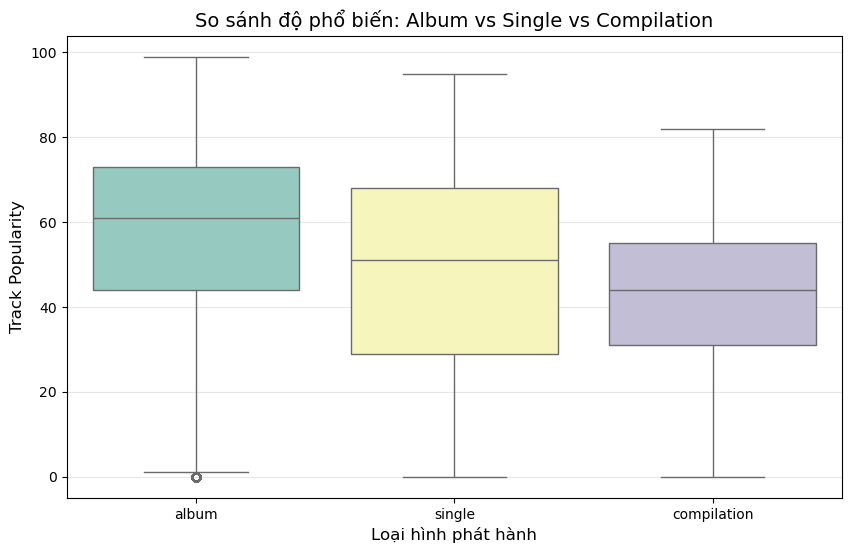

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_q1,
    x='album_type',
    y='track_popularity',
    hue='album_type',
    palette='Set3',
    legend=False
)

plt.title('So sánh độ phổ biến: Album vs Single vs Compilation', fontsize=14)
plt.xlabel('Loại hình phát hành', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

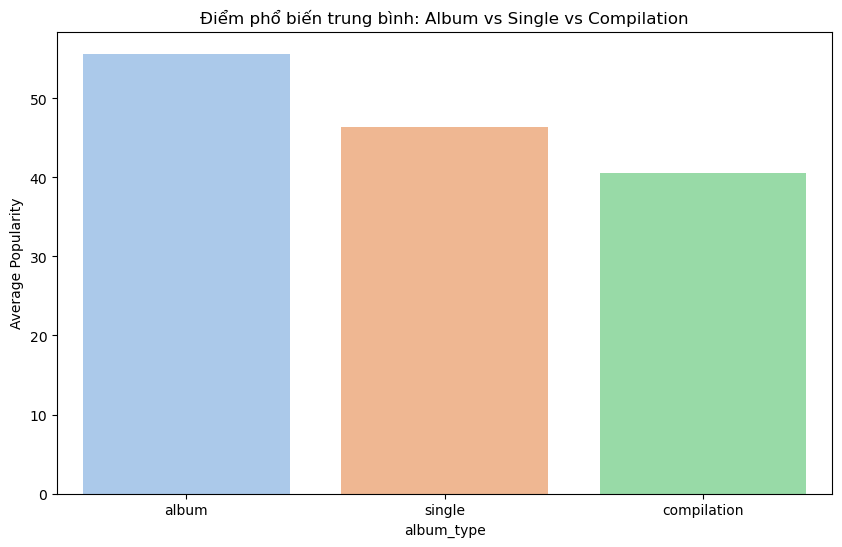

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_q1,
    x='album_type',
    y='track_popularity',
    estimator=np.mean,
    errorbar=None,
    hue='album_type',
    palette='pastel',
    legend=False
)

plt.title('Điểm phổ biến trung bình: Album vs Single vs Compilation')
plt.ylabel('Average Popularity')
plt.show()

**Kết luận tổng quan:**  
Trả lời dựa trên dữ liệu:
- Vị trí của Hộp (Box): Toàn bộ "hộp" (đại diện cho 50% dữ liệu ở giữa - IQR) của nhóm Album được dịch chuyển lên cao hơn so với nhóm Single.
- So sánh tứ phân vị: Đường Q1 (25% dữ liệu dưới cùng) của Album nằm ở mức khá cao, gần tiệm cận với mức Median của Single. Điều này có nghĩa là: khoảng 75% số lượng track trong Album có độ phổ biến cao hơn hoặc bằng mức trung bình khá của Single.  
→ Trong tập dữ liệu này, loại hình phát hành là Album mang lại độ phổ biến (Popularity) cho bài hát tốt hơn so với phát hành dạng Single và Compilation.  

**Trả lời cho động cơ và lợi ích:**
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Dữ liệu cho thấy sự khác biệt rõ rệt về mức độ phổ biến giữa các loại hình phát hành. Việc so sánh album, single và compilation giúp làm rõ chiến lược phát hành nào mang lại hiệu quả phổ biến cao và ổn định hơn trên Spotify.  
       
- Lợi ích / insight mang lại là gì?  
    Kết quả cho thấy:
    - Album có độ phổ biến trung bình và trung vị cao nhất.
    - Single có mức độ phổ biến thấp hơn album nhưng độ biến động cao, thể hiện tiềm năng “hit”.
    - Compilation có mức độ phổ biến thấp nhất trong ba loại hình.
    → Insight này cho thấy mỗi chiến lược phát hành mang lại mức độ rủi ro và hiệu quả khác nhau.  
        
- Ai quan tâm đến kết quả này?  
    → Nghệ sĩ, hãng thu âm, nhà sản xuất âm nhạc và các nền tảng phát nhạc trực tuyến, vì kết quả giúp họ lựa chọn hình thức phát hành phù hợp với mục tiêu tiếp cận khán giả. 

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?    
    Kết quả hỗ trợ:
    - Quyết định chọn phát hành album khi mục tiêu là độ phổ biến ổn định
    - Phát hành single khi muốn thử nghiệm thị trường hoặc tạo hit
    - Hạn chế phụ thuộc vào compilation nếu mục tiêu là tối đa hóa độ phổ biến

### 3.4. Câu hỏi 4 (Câu hỏi dùng mô hình machine learning)

#### 1. Câu hỏi
- Research Question: Hiệu quả của các mô hình học máy trong việc dự đoán `track_popularity` là như thế nào?

#### 2. Động cơ và lợi ích

- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp đánh giá khả năng sử dụng dữ liệu hiện có để dự đoán độ phổ biến của bài hát, từ đó hiểu rõ các yếu tố ảnh hưởng đến thành công trên Spotify.

- Lợi ích / insight mang lại là gì?  
    → Xác định mức độ hiệu quả của các đặc trưng (nghệ sĩ, bài hát, hình thức phát hành, thể loại…) trong việc dự đoán track_popularity, đồng thời đánh giá tiềm năng ứng dụng của học máy trong phân tích âm nhạc.

- Ai quan tâm đến kết quả này?  
    → Nền tảng phát nhạc trực tuyến, hãng thu âm, nghệ sĩ, nhà sản xuất âm nhạc và các nhà phân tích dữ liệu.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ dự đoán sớm mức độ thành công của bài hát, tối ưu chiến lược phát hành, marketing và phân bổ nguồn lực cho các sản phẩm âm nhạc tiềm năng.